# ExtraaLearn Project

**Marks: 60 / 60**

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Documents/Projects/ADSP/ExtraaLearn/ExtraaLearn.csv')

## Data Overview

- Observations
- Sanity checks

In [4]:
df.shape

(4612, 15)

In [5]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

### Numeric features and status

In [7]:
df.select_dtypes(include=['int', 'float']).columns

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'status'],
      dtype='object')

### Categorical features and ID

In [8]:
df.select_dtypes(include=['object']).columns

Index(['ID', 'current_occupation', 'first_interaction', 'profile_completed',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral'],
      dtype='object')

### Check if there's any duplicate rows

In [9]:
df.duplicated().sum()

0

## Initial Observation

- There's no missing entry.
- There are 4 numerical features we'd want to conduct EDA to see the relation to the status.
- There are 9 categorical features we'd want to conduct EDA to see the relation to the status. We'll drop `ID` below because it'd not add any value to our model.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

  **Answer**: The conversion rates for professional, unemployeed, and student are 35.51%, 26.58%, and 11.71%, respectively.

2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

  **Answer**: Yes, the conversion rates for mobile app vs website as their first interaction are 10.53% and 45.59%, respectively. The website gives more impactful impression to new leads.

3. The company uses multiple modes to interact with prospects. Which way of interaction works best?

  **Answer**: The conversion rates for the leads who interacted via email, phone, and website are 30.33%, 21.31%, and 38.45%, respectively. Interaction via the website is the most effective.

4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

  **Answer**: The conversion rates for the leads who discovered us via the newspaper, magazine, digital platform, education channels, and through a reference are 31.99%, 32.19%, 31.88%, 27.94%, and 67.74%, respectively. Leads gotten through references have way higher conversion rates than other channels.


5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

  **Answer**: The conversion rates for profile completion status for leads in high, medium, and low are 41.78%, 18.88%, 7.48%, respectively. It shows a concrete signal that we can anticipate better conversion opportunity for leads who completed their profile more.

See the EDA section for the supporting analysis corresponding to the answers above.

## Unvariate analysis

In [10]:
def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10, 5))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,      # Number of rows of the subplot grid
        sharex=True,  # X-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="violet")

    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins, palette="winter")
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist)

    ax_hist.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-")

    fig.suptitle(f'Distribution of leads by {feature}')

    plt.show()

### age
- Age is left-skewed with the mode at around late 50, near 60. Except the range 50 to 60, most of the age ranges are uniformly distributed.
- There's no outliers.

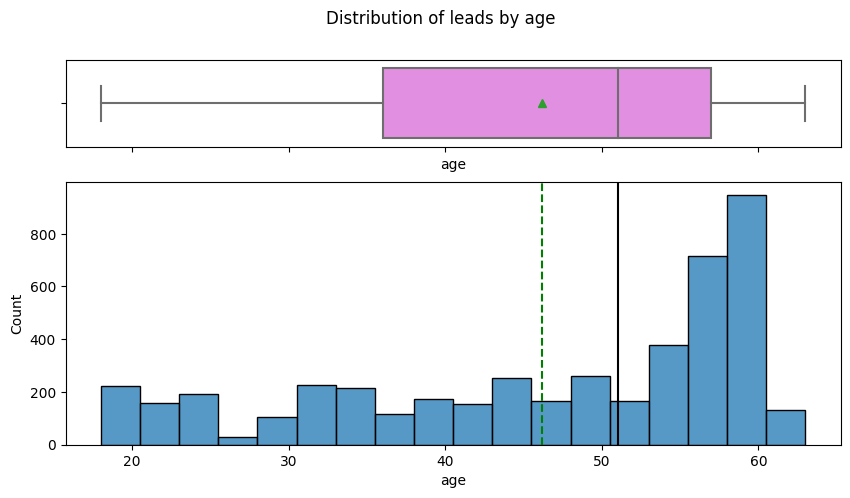

In [11]:
histogram_boxplot(df, 'age')

### website_visits: the number of times leads visited the website
- website_visits is right-skewed with the mode at 2. The median is at around 3.
- The number of visits is conspicuously decreasing from about 10 visits. Those are outliers.

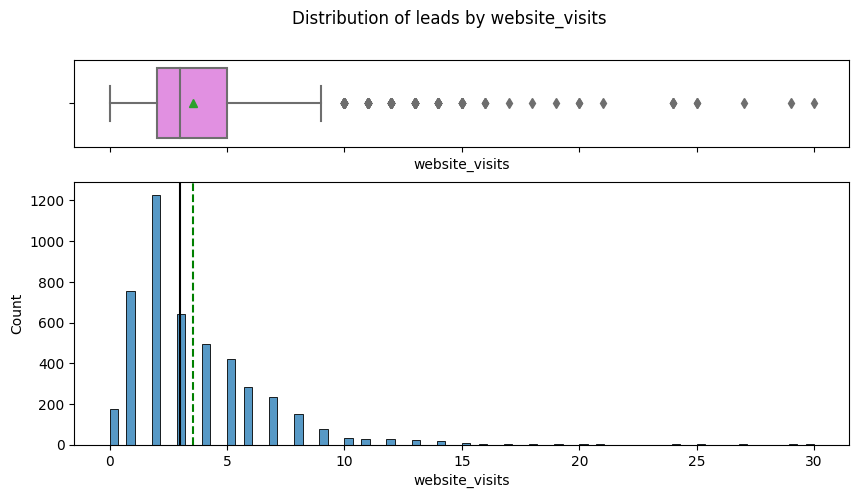

In [12]:
histogram_boxplot(df, 'website_visits')

### time_spent_on_website: the total time spent on the website
- time_spent_on_website has two distinguished patterns to the left and right of about 700. The left part is left-skewed and irregular. The right part looks more normal but with large variance. It's interesting to see if those two different patterns affect the converstion status. We'll see this in the bivariate analysis section more. (The answer is yes!)
- There's no outliers.

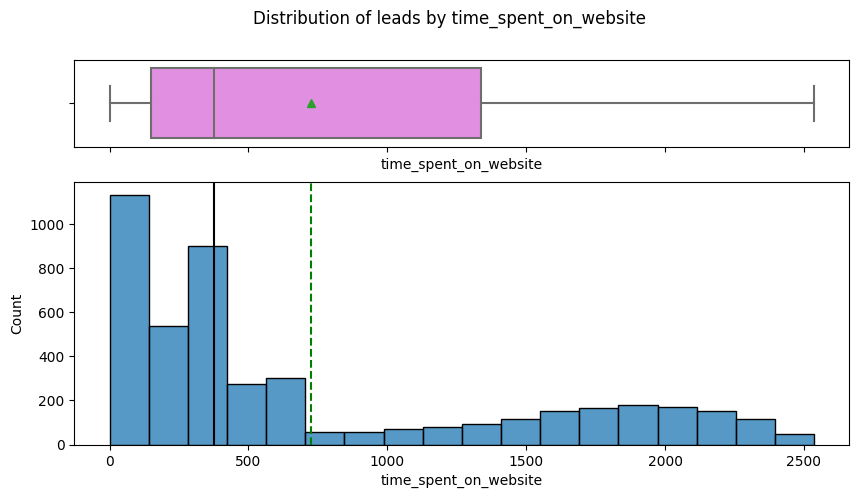

In [13]:
histogram_boxplot(df, 'time_spent_on_website')

### page_views_per_visit: the average number of pages on the website viewed during the visits
- page_views_per_visit is right-skewed with noticeable modes at 0, 2, 3, and 6. There are long tail leads who viewed more than 7 pages. Those are outliers.

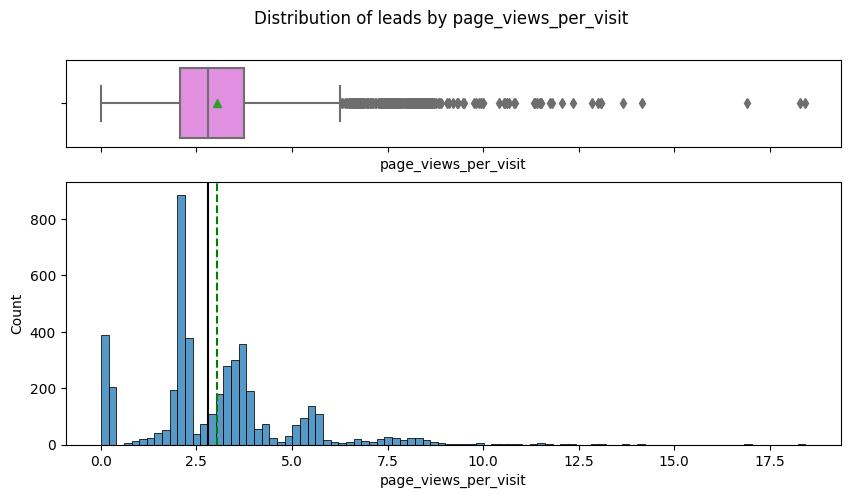

In [14]:
histogram_boxplot(df, 'page_views_per_visit')

### Overall conversion rate
29.9% of leads in the dataset converted.

Sidenote: we should use stratified split in the train_test_split stage to reflect this non-uniform proportion.

In [15]:
np.round(df['status'].value_counts(1), 3)

0    0.701
1    0.299
Name: status, dtype: float64

## Bivariate analysis

### Numerical features vs Status

In [16]:
def violin_boxplot(data, feature, figsize=(10, 5)):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10, 5))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    fig, (ax_violin, ax_box) = plt.subplots(
        ncols=2,      # Number of rows of the subplot grid
        sharey=True,  # X-axis will be shared among all subplots
        gridspec_kw={"width_ratios": (0.5, 0.5)},
        figsize=figsize,
    )

    sns.violinplot(data=data, x='status', y=feature, ax=ax_violin, showmeans=True)
    sns.boxplot(data=data, x='status', y=feature, ax=ax_box, showmeans=True)

    fig.suptitle(f'Status pattern of leads by {feature}')

    plt.show()

### age
- The distributions between non-convert and convert leads are overall not significantly different. But we can observe that early 30's to about 40 did not convert, and late 50's or older leads convert more. This apparently influences the status to certain extent.

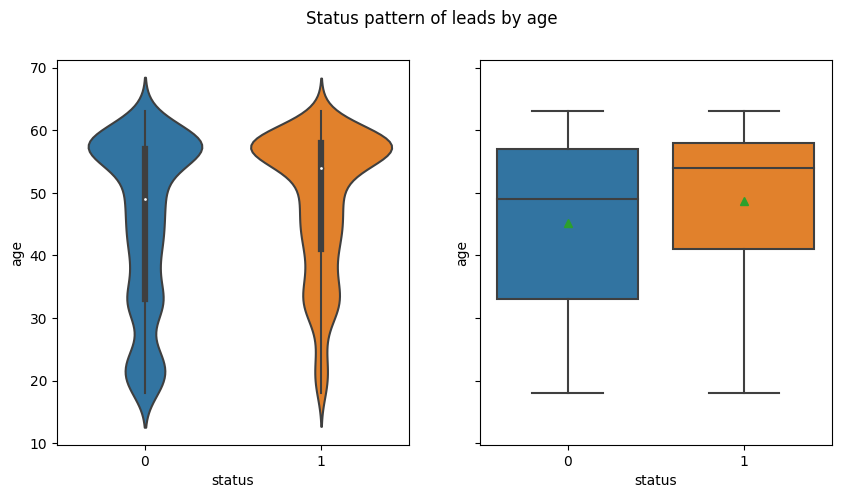

In [17]:
violin_boxplot(df, 'age')

### website_visits: the number of times leads visited the website
- website_visits does not show a significant impact on the status.

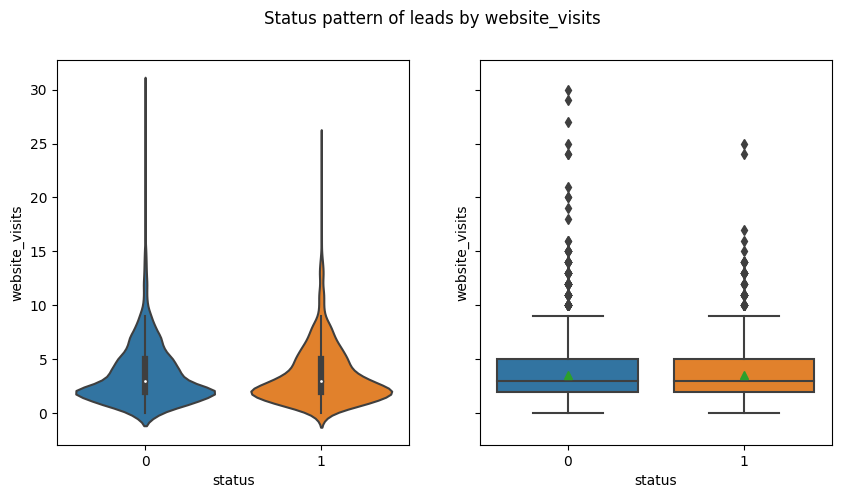

In [18]:
violin_boxplot(df, 'website_visits')

### time_spent_on_website: the total time spent on the website
- time_spent_on_website has two distinguished patterns to the left and right of about 700 as we explored in the univariate analysis section above.
- **It certainly shows that more leads with higher time spent converted more. From the numerical features, this feature shows the highest impact on the status.**

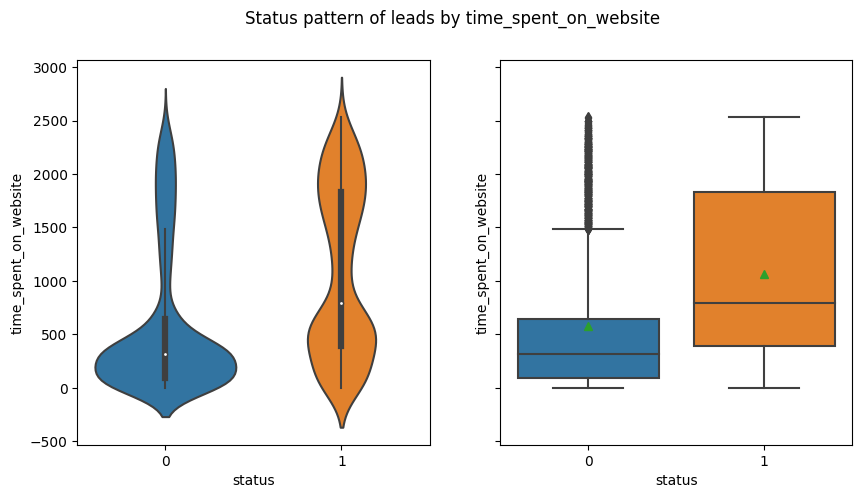

In [19]:
violin_boxplot(df, 'time_spent_on_website')

### page_views_per_visit: the average number of pages on the website viewed during the visits
- page_views_per_visit does not show a significant impact on the status.

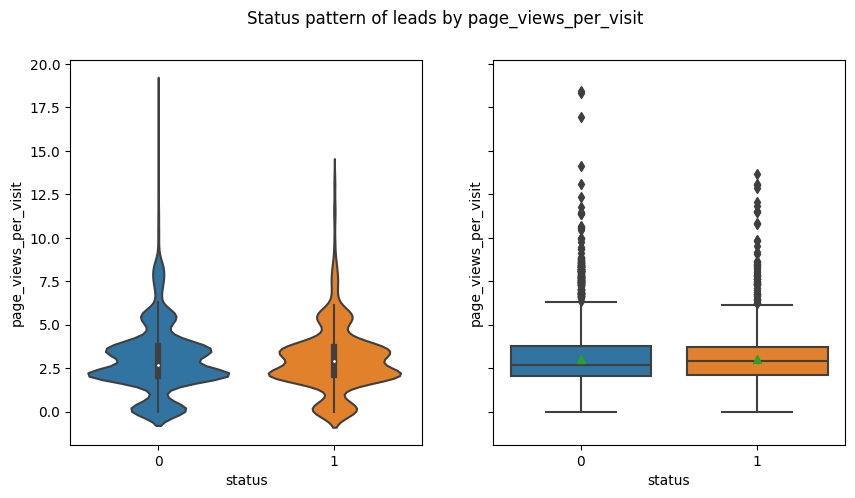

In [20]:
violin_boxplot(df, 'page_views_per_visit')

### Categorical features vs Status

In [21]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()

    ax = None
    crosstab_df = pd.crosstab(df[feature], df['status'])
    if n is None:
        ax = crosstab_df.plot(kind='bar', figsize=(count + 5, 5), stacked=True)
    else:
        ax = crosstab_df.plot(kind='bar', figsize=(n + 5, 5), stacked=True)

    plt.xticks(rotation=45, fontsize=11)

    ax.set_title(f'Number of leads by {feature}')
    ax.set_ylabel('Count')

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x+width/2,
                y+height/2,
                '{:.0f}'.format(height),
                fontsize=8,
                horizontalalignment='center',
                verticalalignment='center')

    plt.show()

    print('Conversion rates (%) for')
    print(np.round(crosstab_df[1] / crosstab_df.sum(axis=1) * 100, 2))


### ID
- ID is a unique identifier of the leads. ID would not add any value to our model. We'll drop this field in our model building stage.

In [22]:
# All leads in the data are unique
df['ID'].nunique() == df.shape[0]

True

### current_occupation: Current occupation of the lead.
- The conversion rates for professional, unemployeed, and student are 35.51%, 26.58%, and 11.71%, respectively.

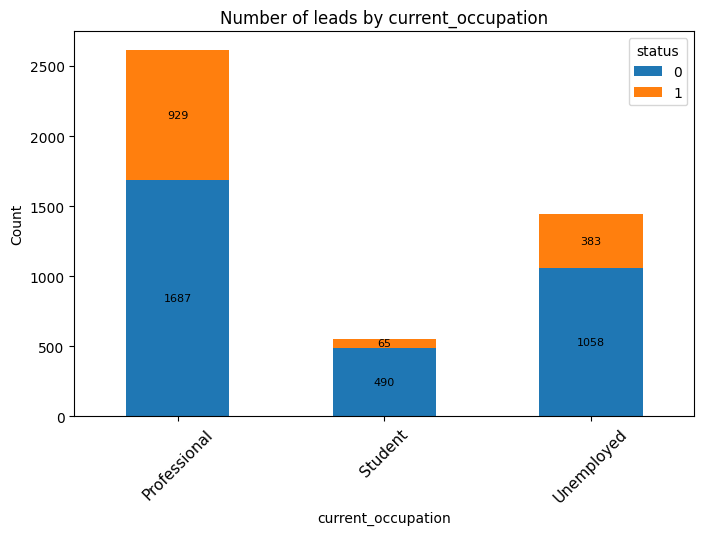

Conversion rates (%) for
current_occupation
Professional    35.51
Student         11.71
Unemployed      26.58
dtype: float64


In [23]:
labeled_barplot(df, 'current_occupation')

### first_interaction: How did the lead first interacted with ExtraaLearn.
- The conversion rates for mobile app vs website as their first interaction are 10.53% and 45.59%, respectively.
- **The website gives more impactful impression to new leads.**

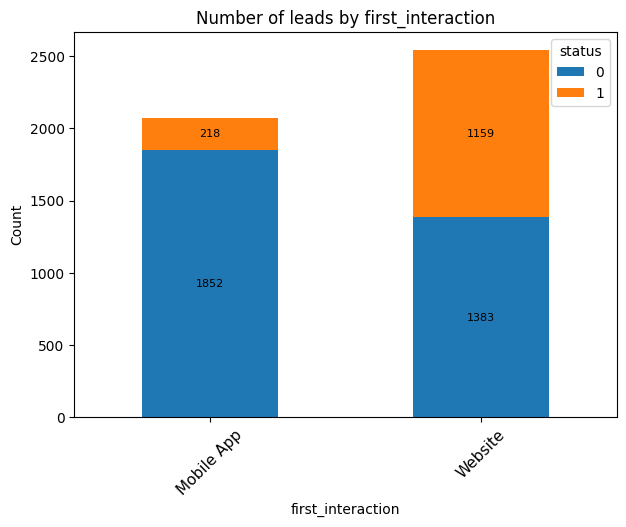

Conversion rates (%) for
first_interaction
Mobile App    10.53
Website       45.59
dtype: float64


In [24]:
labeled_barplot(df, 'first_interaction')

### profile_completed: What percentage of profile has been filled by the lead on the website/mobile app.
- The conversion rates for profile completion status for leads in high, medium, and low are 41.78%, 18.88%, 7.48%, respectively.
- **It shows a concrete signal that we can anticipate better conversion opportunity for leads who completed their profile more.**

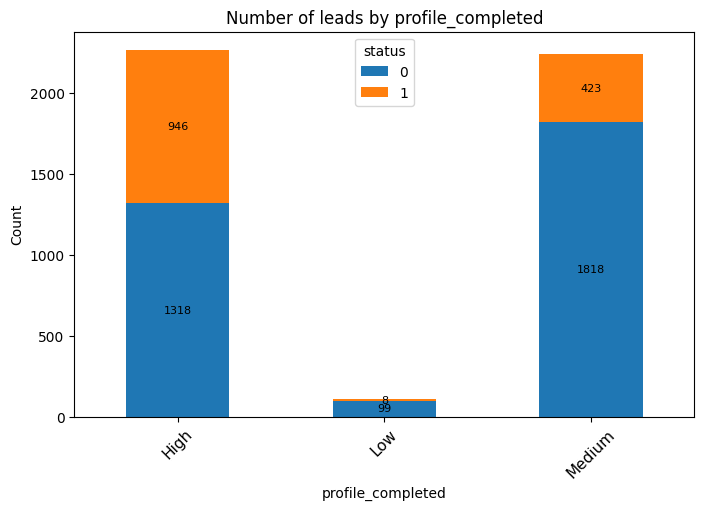

Conversion rates (%) for
profile_completed
High      41.78
Low        7.48
Medium    18.88
dtype: float64


In [25]:
labeled_barplot(df, 'profile_completed')

### last_activity: Last interaction between the lead and ExtraaLearn.
- The conversion rates for the leads who interacted via email, phone, and website are 30.33%, 21.31%, and 38.45%, respectively.
- Interaction via the website is the most effective.

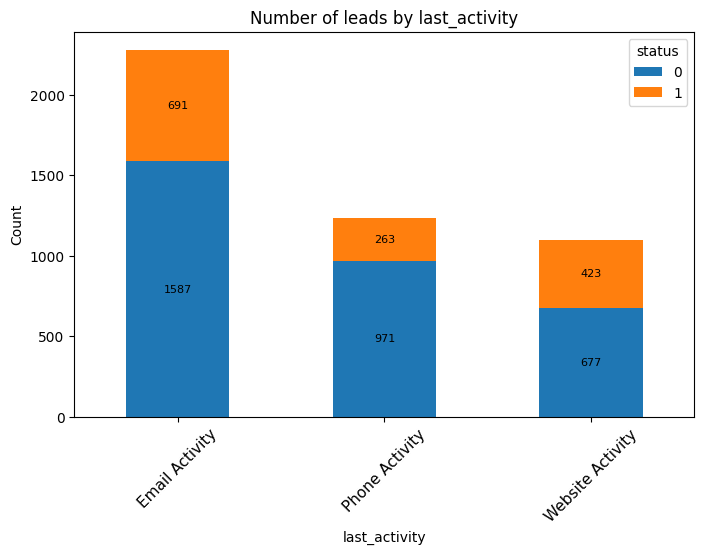

Conversion rates (%) for
last_activity
Email Activity      30.33
Phone Activity      21.31
Website Activity    38.45
dtype: float64


In [26]:
labeled_barplot(df, 'last_activity')

### print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
- The conversion rate for the leads who discovered us via the newspaper is 31.99%.

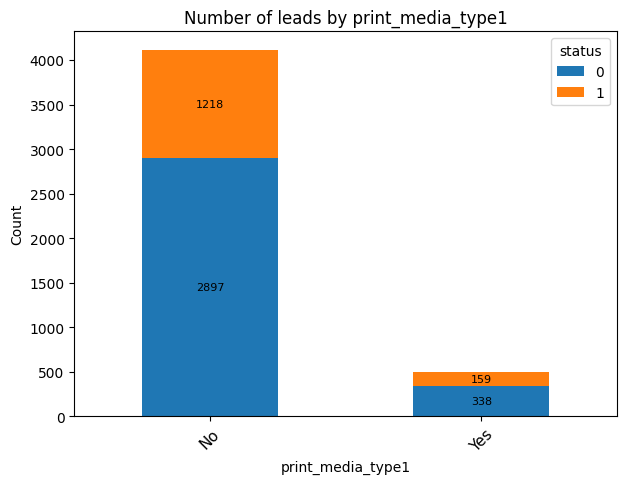

Conversion rates (%) for
print_media_type1
No     29.60
Yes    31.99
dtype: float64


In [27]:
labeled_barplot(df, 'print_media_type1')

### print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
- The conversion rate for the leads who discovered us via the manazine is 32.19%.

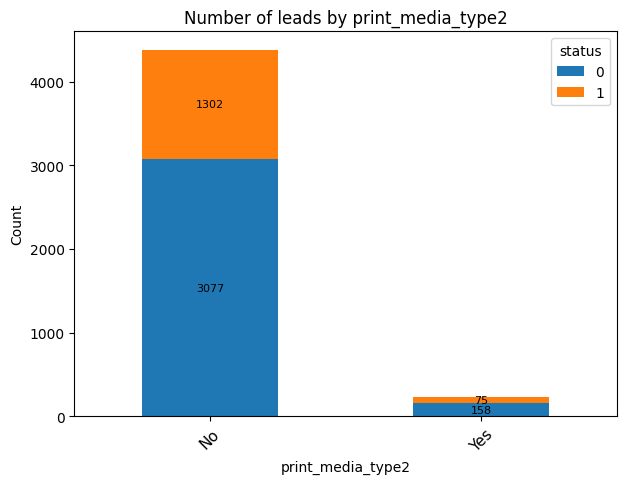

Conversion rates (%) for
print_media_type2
No     29.73
Yes    32.19
dtype: float64


In [28]:
labeled_barplot(df, 'print_media_type2')

### digital_mdeia: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
- The conversion rate for the leads who discovered us via the digital platform is 31.88%.

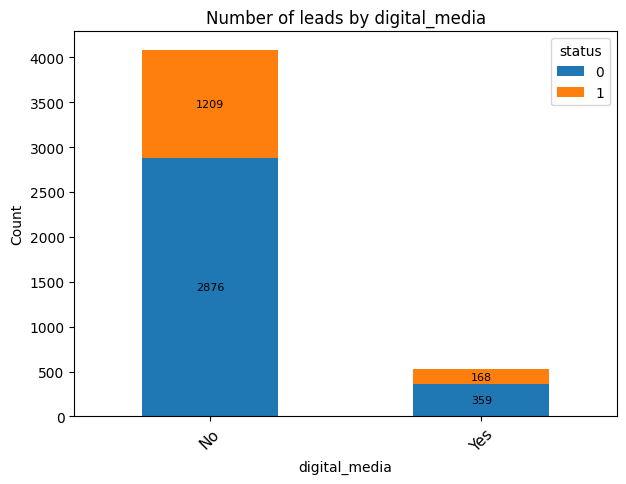

Conversion rates (%) for
digital_media
No     29.60
Yes    31.88
dtype: float64


In [29]:
labeled_barplot(df, 'digital_media')

### educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels.
- The conversion rate for the leads who discovered us via the education channels is 27.94%.
- **This rate is slightly lower than the other channels. We can use this information to investigate if there are any issues or there are any potential improvement opportunity on the education channels to convert more leads.**

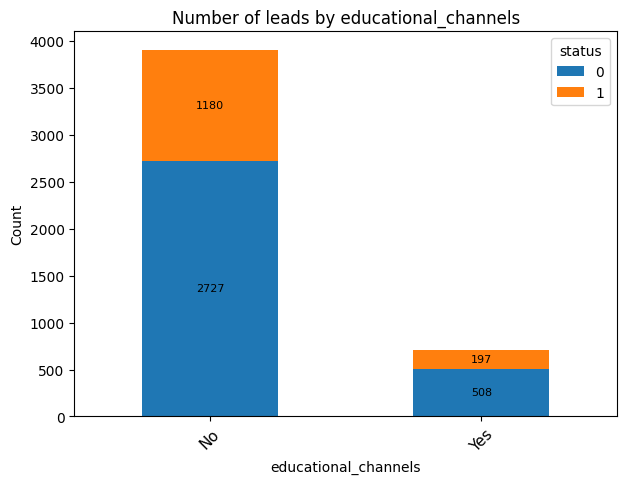

Conversion rates (%) for
educational_channels
No     30.20
Yes    27.94
dtype: float64


In [30]:
labeled_barplot(df, 'educational_channels')

### referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
- The conversion rate for the leads who discovered us throught references is 67.74%.
- **Leads gotten through references have way higher conversion rates than other channels.**

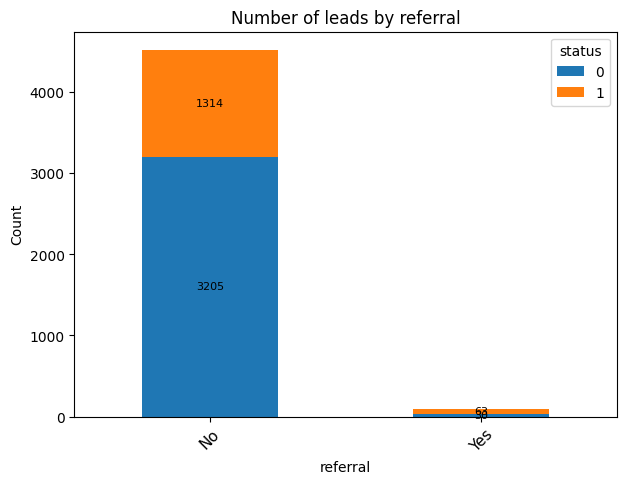

Conversion rates (%) for
referral
No     29.08
Yes    67.74
dtype: float64


In [31]:
labeled_barplot(df, 'referral')

In [32]:
# The number of leads who referred are 93. 63 out of those converted.
pd.crosstab(df['referral'], df['status'])

status,0,1
referral,,
No,3205,1314
Yes,30,63


### Correlation of numerical features
- We observed from the EDA above that the `time_spent_on_website` has the most distinguished pattern among numerical features between non-convert and convert. The correlation matrix supports this observation.
- We also observed from the EDA that early 30's to about 40 did not convert, and late 50's or older leads convert more. The age in the correlation matrix seems to reflect this observation by having a week correlation with the status.

In [33]:
numeric_corr = df.corr(numeric_only=True)
numeric_corr

,age,website_visits,time_spent_on_website,page_views_per_visit,status
age,1.000000,-0.011975,0.018885,-0.040675,0.122084
website_visits,-0.011975,1.000000,0.062300,0.074094,-0.006609
time_spent_on_website,0.018885,0.062300,1.000000,0.068130,0.302100
page_views_per_visit,-0.040675,0.074094,0.068130,1.000000,0.000307
status,0.122084,-0.006609,0.302100,0.000307,1.000000


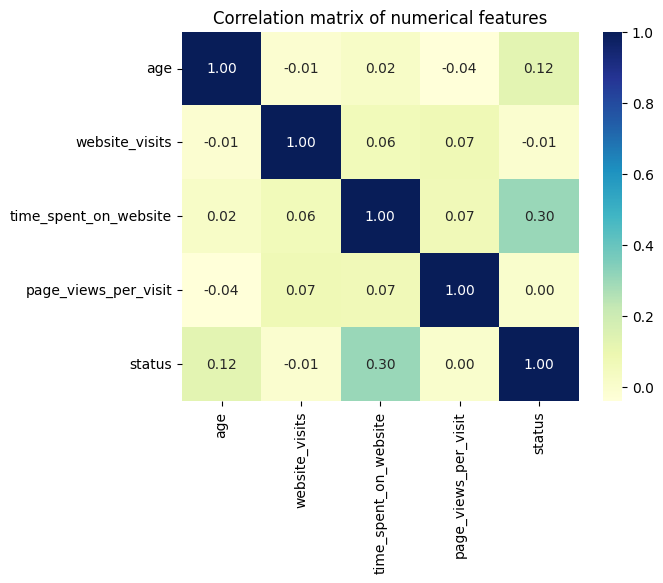

In [34]:
sns.heatmap(numeric_corr, annot=True, fmt='.2f', cmap='YlGnBu')

plt.title('Correlation matrix of numerical features')

plt.show()

## Data Preprocessing
- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Data processing strategies taken
 - There's no missing values.
 - Use all the features because we basically use tree-based models.
 - `website_visits` and `page_views_per_visit` have significant outliers. Before the EDA, I hypothesized that their characteristics for this classification would have possitive correlation to the status as leads spending more time on browsing the website might be more likely to convert. However, the EDA reveal that's not the case. They do not show any meaningful differences between non-convert to convert. We just leave the outliers as-is because the values represent the actual browsing behavior.
 - We'll split the dataset into train (0.8) and test (0.2) for modeling and evaluation in the sections below.
 - We'll standardize the data because we'll include a K-NN model which would be sensitive to the different scales of features.

In [35]:
data = df.copy()

In [36]:
# ID would not have any meaningful value for our models. Dropping ID as planned above.
data = data.drop(columns=['ID'], axis=1)

### Encode catagorial features
- Apply one-hot encooding for non-binary features
- Replace 'Yes'/'No' with 1/0 for binary features

In [37]:
cols_OH_encoding = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']

data = pd.get_dummies(data=data, columns=cols_OH_encoding, drop_first=True)

dict_print_media_type1 = {'Yes': 1, 'No': 0}
dict_print_media_type2 = {'Yes': 1, 'No': 0}
dict_digital_media = {'Yes': 1, 'No': 0}
dict_educational_channels = {'Yes': 1, 'No': 0}
dict_referral = {'Yes': 1, 'No': 0}

data['print_media_type1'] = data['print_media_type1'].map(dict_print_media_type1)
data['print_media_type2'] = data['print_media_type2'].map(dict_print_media_type2)
data['digital_media'] = data['digital_media'].map(dict_digital_media)
data['educational_channels'] = data['educational_channels'].map(dict_educational_channels)
data['referral'] = data['referral'].map(dict_referral)

In [38]:
data.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.861,1,0,1,0,0,1,0,1,1,0,0,0,1
1,56,2,83,0.320,0,0,0,1,0,0,0,0,0,0,1,0,1
2,52,3,330,0.074,0,0,1,0,0,0,0,0,1,0,1,0,1
3,53,4,464,2.057,0,0,0,0,0,1,0,1,1,0,0,0,1
4,23,4,600,16.914,0,0,0,0,0,0,1,0,1,0,0,0,0


### Separate dataset into the feature matrix and target vector

In [39]:
y = data['status']
X = data.drop(columns=['status'])

### Standardize the feature values
- This is primarily conducted for K-NN. However, we'll use the standardized features for other models as well.

In [40]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [41]:
X_scaled.sample(10)

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
4536,-0.471216,2.274164,-0.898169,-0.419798,-0.347531,-0.23067,-0.359178,-0.424789,-0.143457,-0.369866,-0.674115,-1.108160,-0.154115,-0.972199,-0.604405,-0.559653
386,0.440636,-0.200359,-0.795984,0.311942,-0.347531,-0.23067,-0.359178,2.354112,-0.143457,-0.369866,-0.674115,0.902396,-0.154115,1.028596,1.654521,-0.559653
4081,0.592612,1.567158,-0.836320,-0.526002,2.877443,-0.23067,-0.359178,-0.424789,-0.143457,-0.369866,1.483427,0.902396,-0.154115,-0.972199,-0.604405,1.786820
2458,0.516624,0.506647,1.109231,-0.397439,-0.347531,-0.23067,-0.359178,-0.424789,-0.143457,-0.369866,-0.674115,-1.108160,-0.154115,-0.972199,-0.604405,1.786820
2273,0.896562,-0.200359,-0.781194,2.239366,-0.347531,-0.23067,-0.359178,-0.424789,-0.143457,-0.369866,1.483427,0.902396,-0.154115,-0.972199,-0.604405,-0.559653
2543,-0.699179,0.506647,-0.449092,0.345988,-0.347531,-0.23067,-0.359178,-0.424789,-0.143457,-0.369866,-0.674115,0.902396,-0.154115,1.028596,-0.604405,1.786820
1662,0.668599,-0.907366,-0.744891,-1.444235,-0.347531,-0.23067,2.784138,-0.424789,-0.143457,-0.369866,-0.674115,-1.108160,-0.154115,1.028596,-0.604405,-0.559653
2400,0.668599,-0.553863,-0.863211,-0.412176,-0.347531,-0.23067,-0.359178,-0.424789,-0.143457,-0.369866,1.483427,-1.108160,-0.154115,1.028596,1.654521,-0.559653
3555,0.288661,-0.907366,2.135117,1.063500,-0.347531,-0.23067,-0.359178,-0.424789,-0.143457,-0.369866,-0.674115,0.902396,-0.154115,-0.972199,1.654521,-0.559653
2342,0.896562,-0.553863,-0.607748,-0.408619,-0.347531,-0.23067,-0.359178,-0.424789,-0.143457,-0.369866,1.483427,0.902396,-0.154115,1.028596,1.654521,-0.559653


### Split data into train and test
- Considering the target label has a class imbalance (skewed towards non-convert), we used stratify argument in the call.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=1, stratify=y)

### Metrics
- For this problem, **Precision is more important than Recall because we are more sensitive to false positives (i.e., we predicted they will convert but actually don't)**. However, our primary goal is to predict true positives as best as we can. So, we'll use F-1 score and accuracy as the main performance metrics while focusing on Precision over Recall at the same time.
- When evaluating the performance across different models, we'll use the metrics calculated for the test dataset because our goal is to provide accurate prediction on unseen leads.

In [43]:
def metrics_score(actual, predicted):
    print('[Classification report and its confusion matrix]:', end='\n\n')
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot=True, fmt='.2f',
                xticklabels=['Not Converted', 'Converted'],
                yticklabels=['Not Converted', 'Converted'],
                cmap='Reds')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Modeling and Evaluation
In addtion to the decision tree and random forest models, I extended the modeling and evaluation practice by adding logistic regression, K-NN, and XGB models as well.

### **Logistic Regression**
LogisticRegresssion model with default hyper parameters. I.e., with l2 regularization. We'll use the same features for models across our training and evaluation process in this iteration. Feature engineering to reduce colinearity for the logistic regression model is left as a future work.

[Classification report and its confusion matrix]:

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      2264
           1       0.73      0.64      0.68       964

    accuracy                           0.82      3228
   macro avg       0.79      0.77      0.78      3228
weighted avg       0.82      0.82      0.82      3228



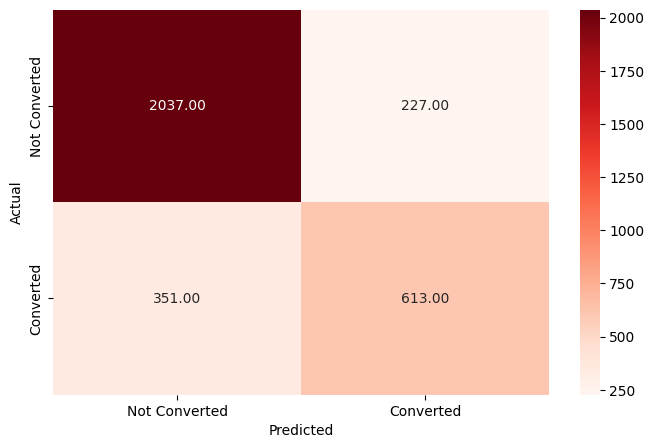

In [44]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_train_pred = lg.predict(X_train)
metrics_score(y_train, y_train_pred)

[Classification report and its confusion matrix]:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       971
           1       0.75      0.63      0.69       413

    accuracy                           0.83      1384
   macro avg       0.80      0.77      0.78      1384
weighted avg       0.82      0.83      0.82      1384



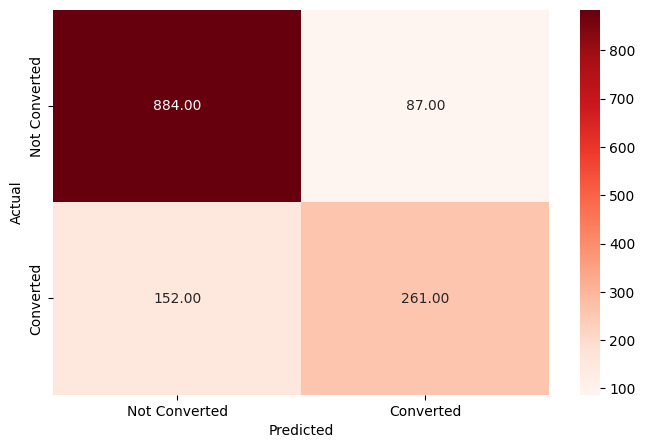

In [45]:
y_test_pred = lg.predict(X_test)
metrics_score(y_test, y_test_pred)

**Observation: Logistic Regression**

- Scores
  - Precision: 0.75
  - Accuracy: 0.83
  - F1-score: 0.69
- The model is not overfitted. It shows comparable results for both train and test datasets.
- Precision is better than Recall.


### Coefficient analysis
The coef_ attribute supports what we found from the EDA.

- First interaction via website had significantly more conversion rate than mobile: 45.59 % to 10.53%.
- Time spent on website is a numerical feature that has different patterns between non-convert and convert. This is the second highest coffient in the list below.
- Likewise, last activity done via website, leads found us through referral, and age show some level of positive correlation with the status.
- Profile completed low and medium shows somewhat strong negative correlation which was expected from the EDA.
- Also, students show low conversion rate compared to professional. This is represented in the list below.

In [46]:
cols = X.columns
coef_lg = lg.coef_
pd.DataFrame(coef_lg, columns=cols).T.sort_values(by=0, ascending=False)

,0
first_interaction_Website,1.299928
time_spent_on_website,0.861140
last_activity_Website Activity,0.244566
referral,0.208486
age,0.079165
educational_channels,0.041793
print_media_type2,0.031552
digital_media,0.025592
print_media_type1,0.024604
page_views_per_visit,-0.036427


### Tune the threshold for better F1-score, accuracy as well as Precision
- As we focus more one better Precision than Recall, I'm trying to use different threshold values to optimize the model for the goal.

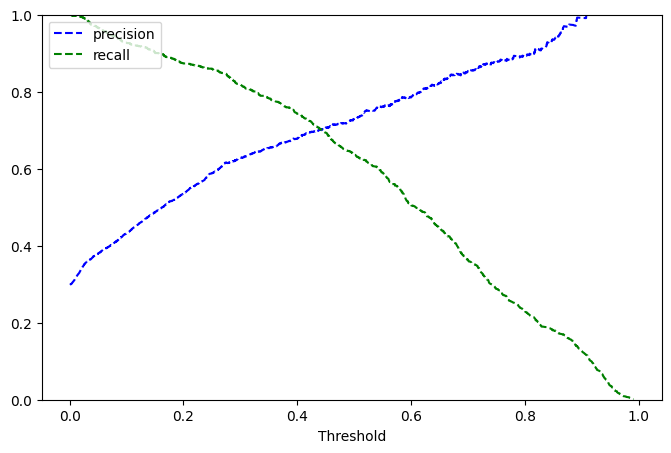

In [47]:
y_scores_lg = lg.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (8, 5))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label='recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0, 1])
plt.show()

**Observation**
- About 0.45 is the sweet spot for good balance between Precision and Recall.
- I tried 0.45, 0.5, 0.55, and 0.65 and found 0.5 is the best threshold for the criteria. 0.45 provides the best F1-score (0.7). However, the precision is lower than that of 0.5 with the same accuray.

[Classification report and its confusion matrix]:

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      2264
           1       0.73      0.64      0.68       964

    accuracy                           0.82      3228
   macro avg       0.79      0.77      0.78      3228
weighted avg       0.82      0.82      0.82      3228



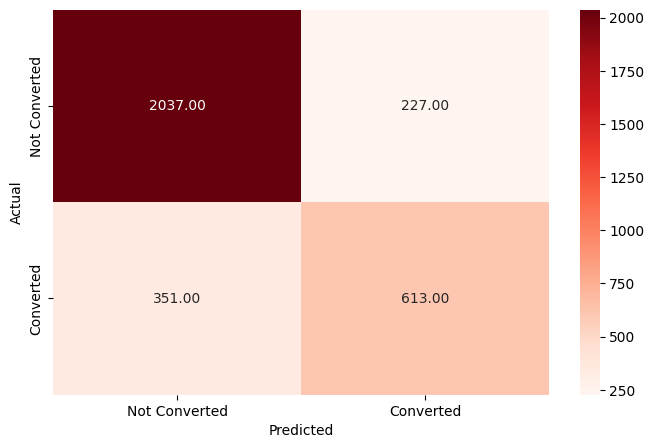

In [48]:
optimal_threshold = .5
y_train_pred = lg.predict_proba(X_train)
metrics_score(y_train, y_train_pred[:, 1] > optimal_threshold)

[Classification report and its confusion matrix]:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       971
           1       0.75      0.63      0.69       413

    accuracy                           0.83      1384
   macro avg       0.80      0.77      0.78      1384
weighted avg       0.82      0.83      0.82      1384



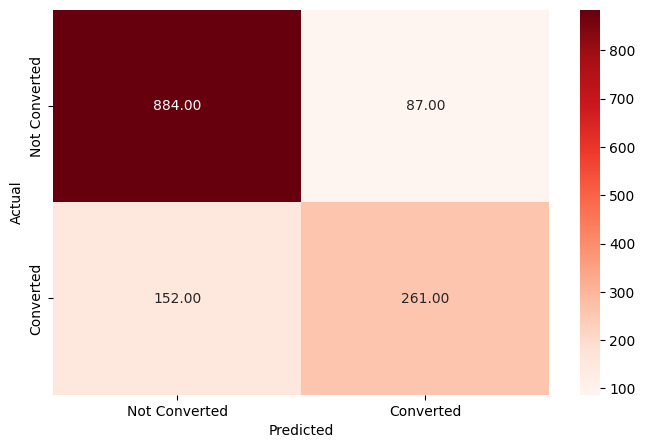

In [49]:
y_test_pred = lg.predict_proba(X_test)
metrics_score(y_test, y_test_pred[:, 1] > optimal_threshold)

From the logistic regression model on the test dataset, we captured 261 true positives (TP) and 87 false positives (FP). I'll compare these numbers with that of the other models as training and evaluating them below.

## Building a **Decision Tree** model

Starting with the basic model with default hyper parameters.

In [50]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt = dt.fit(X_train, y_train)

## Model Performance evaluation and improvement

As exepcted, no tree depth limitation yielded an overfit model. We'll conduct a hyperparameter tuning process.

[Classification report and its confusion matrix]:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



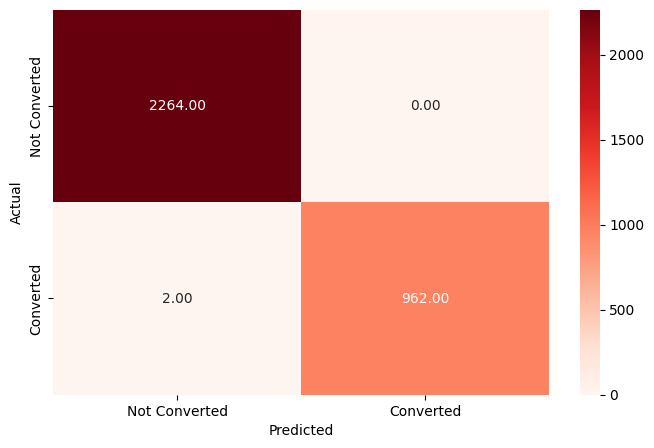

In [51]:
y_train_pred = dt.predict(X_train)
metrics_score(y_train, y_train_pred)

[Classification report and its confusion matrix]:

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       971
           1       0.67      0.62      0.64       413

    accuracy                           0.79      1384
   macro avg       0.76      0.75      0.75      1384
weighted avg       0.79      0.79      0.79      1384



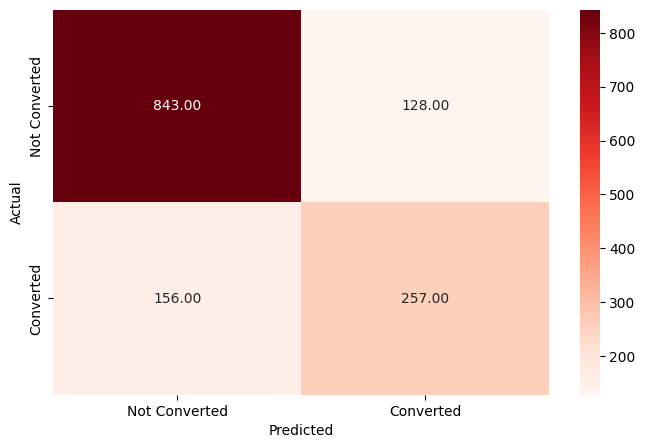

In [52]:
y_test_pred = dt.predict(X_test)
metrics_score(y_test, y_test_pred)

**Observation: Decision Tree before hyperparameter tuning**

- Scores
  - Precision: 0.67
  - Accuracy: 0.79
  - F1-score: 0.64
- The model is overfitted. It shows perfect accurary with the training data and much worse accurary with the test data.
- The performance is worse than the logistic regression results.

### **Tune the hyperparameters** with GridSearchCV

In [53]:
dt_tuned = tree.DecisionTreeClassifier(random_state=0)

# Grid of parameters to choose from
dt_parameters = {'max_depth': [5, 7, 9],
                 'min_samples_leaf': [1, 3, 5]
                 }

# Run the grid search
dt_grid_obj = GridSearchCV(dt_tuned, dt_parameters, scoring='f1', cv=4)
dt_grid_obj = dt_grid_obj.fit(X_train, y_train)

# Set the dt_tuned_classifier to the best combination of parameters
dt_tuned_classifier = dt_grid_obj.best_estimator_

dt_tuned_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [54]:
dt_grid_obj.best_params_

{'max_depth': 7, 'min_samples_leaf': 1}

[Classification report and its confusion matrix]:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2264
           1       0.81      0.80      0.81       964

    accuracy                           0.88      3228
   macro avg       0.86      0.86      0.86      3228
weighted avg       0.88      0.88      0.88      3228



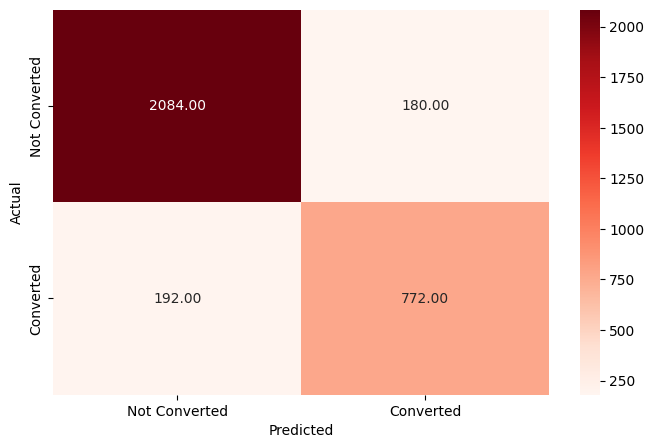

In [55]:
y_train_pred = dt_tuned_classifier.predict(X_train)
metrics_score(y_train, y_train_pred)

[Classification report and its confusion matrix]:

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       971
           1       0.77      0.75      0.76       413

    accuracy                           0.86      1384
   macro avg       0.83      0.83      0.83      1384
weighted avg       0.86      0.86      0.86      1384



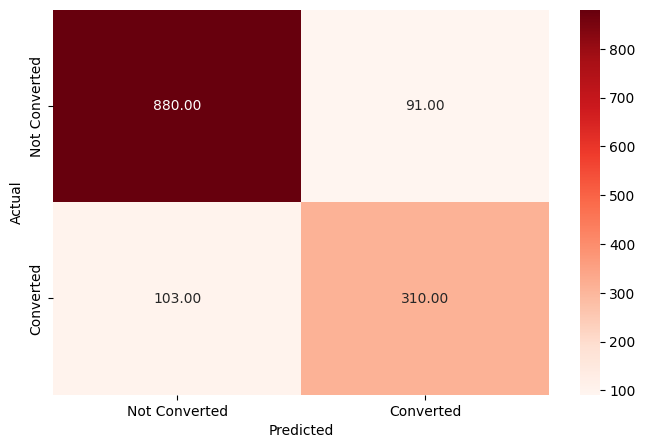

In [56]:
y_test_pred = dt_tuned_classifier.predict(X_test)
metrics_score(y_test, y_test_pred)

**Observation: Decision Tree after hyperparameter tuning**:
{'max_depth': 7, 'min_samples_leaf': 1}
- Scores
  - Precision: 0.77
  - Accuracy: 0.86
  - F1-score: 0.76
- The model shows better performance than the logistic regression model in all of F1-score, Accuracy, and Precision metrics.

### The order of the feature importance out of the decision making process of the tree

It aligns with the observation from the logistic regression coefficients: time spent on website, first interaction via website, profile completion, age, occupation ranked at the top importance.

In [57]:
feature_imp = pd.Series(dt_tuned_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

time_spent_on_website             0.264618
first_interaction_Website         0.236572
profile_completed_Medium          0.195985
age                               0.079998
last_activity_Phone Activity      0.057440
current_occupation_Unemployed     0.055302
last_activity_Website Activity    0.040241
profile_completed_Low             0.023728
page_views_per_visit              0.020992
website_visits                    0.013192
referral                          0.005369
print_media_type1                 0.003195
digital_media                     0.002036
current_occupation_Student        0.001332
print_media_type2                 0.000000
educational_channels              0.000000
dtype: float64

## Building a **Random Forest** model

Starting with the basic model with default hyper parameters.

In [58]:
rf = RandomForestClassifier(random_state=0)
rf = rf.fit(X_train, y_train)

## Model Performance evaluation and improvement

As exepcted, no depth limitations for the trees yielded an overfit model. We'll conduct a hyperparameter tuning process.

[Classification report and its confusion matrix]:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



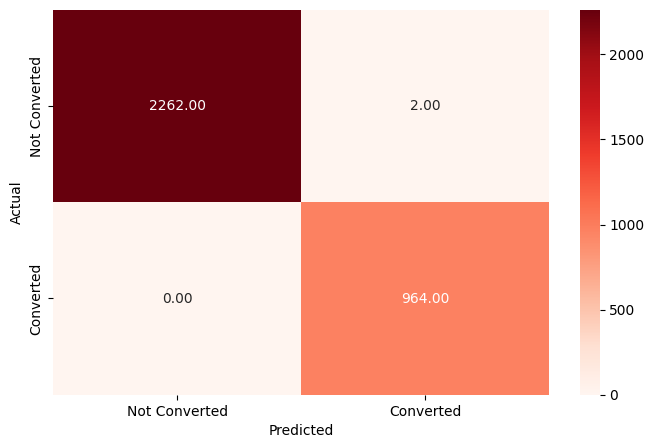

In [59]:
y_train_pred = rf.predict(X_train)
metrics_score(y_train, y_train_pred)

[Classification report and its confusion matrix]:

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       971
           1       0.79      0.74      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.83      0.83      1384
weighted avg       0.86      0.86      0.86      1384



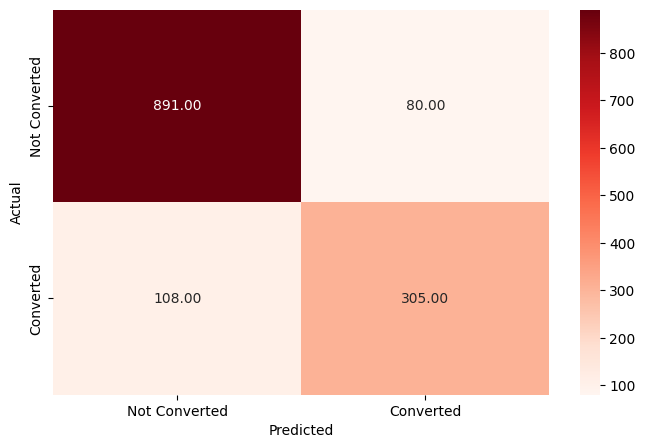

In [60]:
y_test_pred = rf.predict(X_test)
metrics_score(y_test, y_test_pred)

**Observation: Random Forest before hyperparameter tuning**

- Scores
  - Precision: 0.79
  - Accuracy: 0.86
  - F1-score: 0.76
- The model is overfitted. It shows almost perfect accurary with the training data and relatively worse accurary with the test data.
- However, the performance on the test data is already the best among all the above models.

### **Tune the hyperparameters** with GridSearchCV

In [61]:
rf_tuned = RandomForestClassifier(random_state=0)

# Grid of parameters to choose from
rf_parameters = {'n_estimators': [20, 30, 50],
                 'max_depth': [5, 8, 10],
                 'min_samples_split': [2, 5, 10]
                 }

# Run the grid search
rf_grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring='f1', cv=4)
rf_grid_obj = rf_grid_obj.fit(X_train, y_train)

# Set the rf_tuned_classifier to the best combination of parameters
rf_tuned_classifier = rf_grid_obj.best_estimator_

rf_tuned_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=30, random_state=0)

In [62]:
rf_grid_obj.best_params_

{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 30}

[Classification report and its confusion matrix]:

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2264
           1       0.83      0.80      0.82       964

    accuracy                           0.89      3228
   macro avg       0.87      0.87      0.87      3228
weighted avg       0.89      0.89      0.89      3228



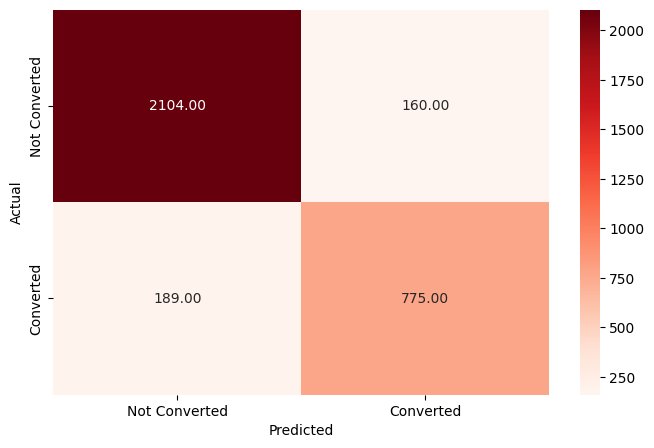

In [63]:
y_train_pred = rf_tuned_classifier.predict(X_train)
metrics_score(y_train, y_train_pred)

[Classification report and its confusion matrix]:

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       971
           1       0.79      0.75      0.77       413

    accuracy                           0.87      1384
   macro avg       0.84      0.83      0.84      1384
weighted avg       0.86      0.87      0.86      1384



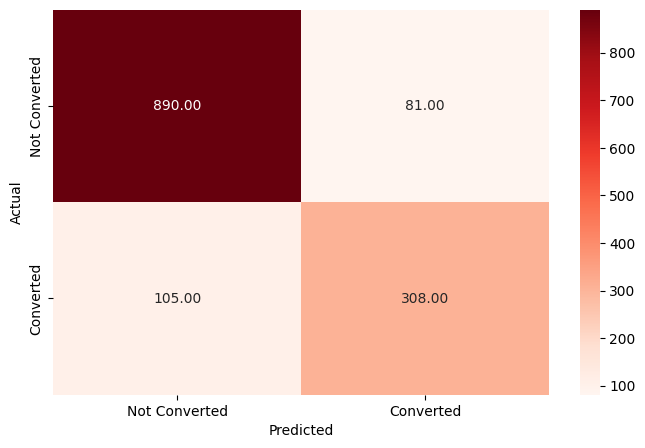

In [64]:
y_test_pred = rf_tuned_classifier.predict(X_test)
metrics_score(y_test, y_test_pred)

**Observation: Random Forest after hyperparameter tuning**:
{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 30}
- Scores
  - Precision: 0.79
  - Accuracy: 0.87
  - F1-score: 0.77
- The model shows better performance than any of the above models in all of F1-score, Accuracy, and Precision metrics.

### The order of the feature importance out of the random forest model

It largely aligns with the observation from the logistic regression coefficients and feature importance from the decision tree model: first interaction via website, time spent on website, profile completion, age, occupation ranked at the top importance.

In [65]:
feature_imp = pd.Series(rf_tuned_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

first_interaction_Website         0.285904
time_spent_on_website             0.283791
profile_completed_Medium          0.118487
age                               0.058369
page_views_per_visit              0.049810
last_activity_Phone Activity      0.042581
current_occupation_Student        0.032580
current_occupation_Unemployed     0.028868
website_visits                    0.026433
last_activity_Website Activity    0.023184
profile_completed_Low             0.018492
referral                          0.011759
educational_channels              0.006162
print_media_type1                 0.006155
digital_media                     0.003838
print_media_type2                 0.003587
dtype: float64

## Building a **K-NN** model

### Find optimal k

Learning with k = 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, Completed!


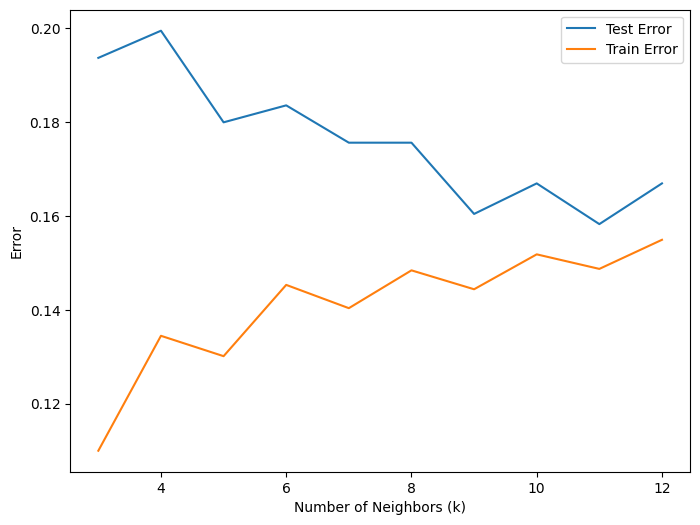

In [66]:
knn_many_split = {}

print(f'Learning with k =', end=' ')
for k in range(3,13):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors = k)
    print(k, end=', ')

    for i in range(100):
        # Fitting the K-NN model
        knn.fit(X_train, y_train)

        # Finding train and test errors
        train_error.append(1 - knn.score(X_train, y_train))
        test_error.append(1 - knn.score(X_test, y_test))

    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista
print('Completed!')

kl = []
vl = []
v2 = []

for k, v in knn_many_split.items():
    kl.append(k)
    vl.append(knn_many_split[k][1])
    v2.append(knn_many_split[k][0])

plt.figure(figsize = (8, 6))

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error")
plt.plot(kl, vl, label = 'Test Error')
plt.plot(kl, v2, label = 'Train Error')
plt.legend()

plt.show()

### Evaluate the performance of K-NN with optimal k in terms of metrics
The experiment above suggests the best k in the range of 9 to higher numbers. I've tried 9 to 12 and found 11 shows the best Precision, Accuracy, and F1-score among them.

In [67]:
k = 11 # default value
knn = KNeighborsClassifier(n_neighbors = k)
knn = knn.fit(X_train, y_train)

[Classification report and its confusion matrix]:

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2264
           1       0.80      0.67      0.73       964

    accuracy                           0.85      3228
   macro avg       0.83      0.80      0.81      3228
weighted avg       0.85      0.85      0.85      3228



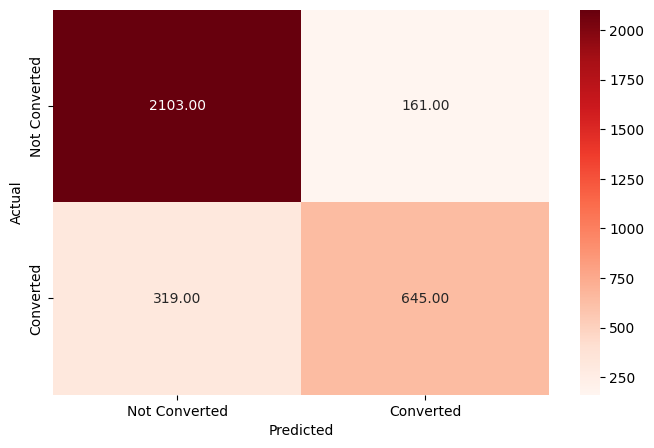

In [68]:
y_train_pred = knn.predict(X_train)
metrics_score(y_train, y_train_pred)

[Classification report and its confusion matrix]:

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       971
           1       0.77      0.66      0.71       413

    accuracy                           0.84      1384
   macro avg       0.82      0.79      0.80      1384
weighted avg       0.84      0.84      0.84      1384



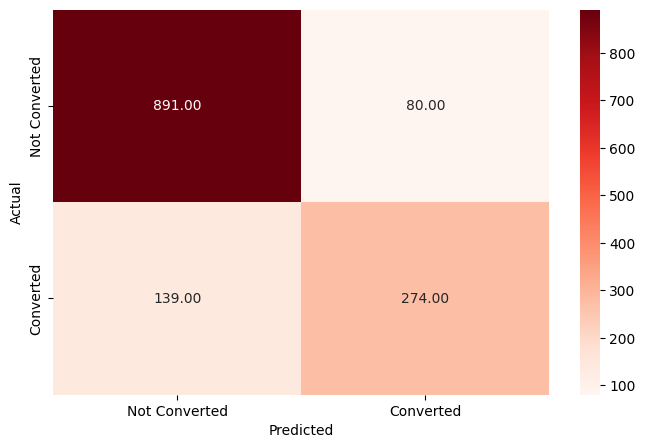

In [69]:
y_test_pred = knn.predict(X_test)
metrics_score(y_test, y_test_pred)

**Observation: K-NN wih k = 11**:
- Scores
  - Precision: 0.77
  - Accuracy: 0.84
  - F1-score: 0.71
- The model runs faster than the random forest model. However, the performance is worse than that of the random forest in all of F1-score, Accuracy, and Precision metrics.

## Building a **XGB** model

Finally, I'm trying a XGB model which is known to yield good performance with the default hyper parameters. I'll try this model with the default parameters.

In [70]:
!pip install xgboost

In [71]:
from xgboost import XGBClassifier

In [72]:
xgb = XGBClassifier(random_state=0, eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=0, ...)

[Classification report and its confusion matrix]:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       0.99      0.99      0.99       964

    accuracy                           1.00      3228
   macro avg       0.99      1.00      0.99      3228
weighted avg       1.00      1.00      1.00      3228



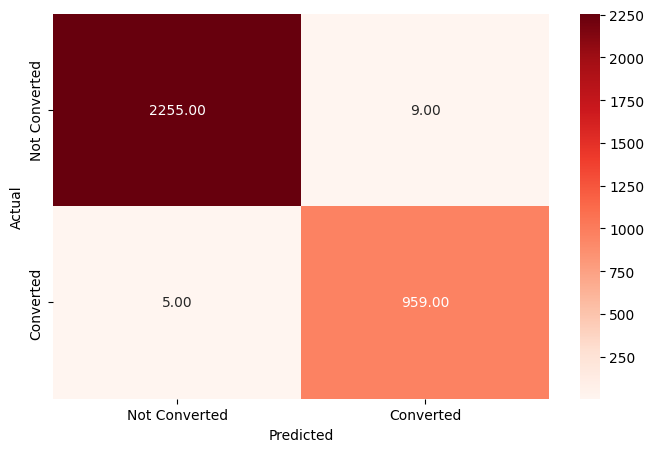

In [73]:
y_train_pred = xgb.predict(X_train)
metrics_score(y_train, y_train_pred)

[Classification report and its confusion matrix]:

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       971
           1       0.73      0.71      0.72       413

    accuracy                           0.83      1384
   macro avg       0.80      0.80      0.80      1384
weighted avg       0.83      0.83      0.83      1384



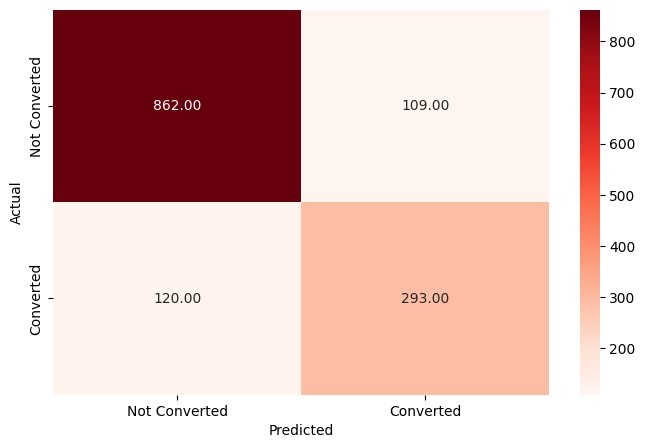

In [74]:
y_test_pred = xgb.predict(X_test)
metrics_score(y_test, y_test_pred)

**Observation: XGB**:
- Scores
  - Precision: 0.73
  - Accuracy: 0.83
  - F1-score: 0.72
- The model shows good performance overall in Precision, Accuracy, and F1-score. However, the performance is worse than that of the random forest.

## Select the **final model**: **Random Forest** model

From the modeling and evaluation process, we conclude that the Random Forest model shows the best prediction results. Here's the summary of the model performance on the **test** dataset:

|         | Precision (%) | Accuracy (%) | F1-score (%) | FP (Count) | TP (Count) |
| ------- |:--------:|:--------:|:--------:|:--------:|:--------:|
| **Logistic Regression** | 75 | 83 | 69 | 87 | 261 |
| **Decition Tree** | 77 | 86 | 76 | 91 | **310** |
| **Random Forest** | **79** | **87** | **77** | 81 | 308 |
| **K-NN** | 77 | 84 | 71 | **80** | 274 |
| **XGB** | 73 | 83 | 72 | 109 | 293 |

- FP is false positive. Lower is better.
- TP is true positive. Higher is better.

With the Random Forest model, we could find 308 TP and 81 FP, which is the overall best prediction results.


### Train the best model with the entire dataset

In [75]:
final_model = RandomForestClassifier(max_depth=8, min_samples_split=2, n_estimators=30)
final_model = final_model.fit(X, y)

# final_model is ready for a production flight!

## Actionable Insights and Recommendations
- Among all the trained and evaluated models, the Random Forest model with the hyperparameters `{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 30}` performs the best.
- The final model is expected to provide approximately 87% accuracy and 79% precision. However, we should evaluate the model's performance with unseen leads in a real-world environment. Depending on the findings, we may need to iterate on the analysis, modeling, and evaluation processes.

### Takeaways and Recommendations:
  - Leads who spent more time on the website were more likely to convert. We should investigate the key tasks these leads were performing. This understanding could help us design experiences that encourage new leads to spend more time on the website.
  - Our website has a more significant impact on leads compared to our mobile platform. While continuing to enhance the website experience, we should identify areas for improvement in our mobile user experience.
  - We observed that leads with higher profile completion rates were more likely to convert. We should aim to make profile completion more straightforward for leads. Additionally, we could research leads with low to medium profile completion to understand their frustrations and potential barriers.
  - Our education channels have a slightly lower conversion rate than other channels. We should investigate potential issues or areas for improvement in these channels to increase lead conversions.
  - Leads acquired through referrals have a significantly higher conversion rate compared to other channels. However, the proportion of leads discovering us through referrals is noticeably lower than that through other channels. Therefore, we should consider amplifying our efforts to promote the referral program.